# How long some of the real-estate stays on the market before they rent or sell?

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [75]:
# Read CSV "Mean Days to Close (Raw, All Homes, Monthly)"

# Show all rows/columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Raw data link and read_csv
filename = "Metro_mean_days_to_close_uc_sfrcondo_month.csv"
df_mean = pd.read_csv(filename)

In [76]:
df_mean.head()

RegionID  SizeRank       RegionName RegionType StateName  2018-01-31  \
0    102001         0    United States    country       NaN        38.0   
1    394913         1     New York, NY        msa        NY        61.0   
2    753899         2  Los Angeles, CA        msa        CA        38.0   
3    394463         3      Chicago, IL        msa        IL        46.0   
4    394514         4       Dallas, TX        msa        TX        22.0   

   2018-02-28  2018-03-31  2018-04-30  2018-05-31  2018-06-30  2018-07-31  \
0        34.0        33.0        34.0        35.0        37.0        36.0   
1        57.0        54.0        49.0        49.0        54.0        56.0   
2        33.0        32.0        32.0        33.0        34.0        34.0   
3        42.0        41.0        42.0        44.0        45.0        44.0   
4        21.0        20.0        21.0        22.0        22.0        22.0   

   2018-08-31  2018-09-30  2018-10-31  2018-11-30  2018-12-31  2019-01-31  \
0        36.0        36.0        36.0        35.0        35.0        37.0   
1        55.0        55.0        55.0        52.0        52.0        57.0   
2        33.0        33.0        33.0        34.0        33.0        36.0   
3        42.0        42.0        41.0        41.0        40.0        44.0   
4        21.0        22.0        22.0        22.0        21.0        23.0   

   2019-02-28  2019-03-31  2019-04-30  2019-05-31  2019-06-30  2019-07-31  \
0        34.0        34.0        34.0        36.0        37.0        37.0   
1        56.0        52.0        50.0        51.0        53.0        55.0   
2        32.0        32.0        33.0        33.0        35.0        35.0   
3        41.0        40.0        40.0        43.0        44.0        43.0   
4        21.0        21.0        22.0        22.0        22.0        22.0   

   2019-08-31  2019-09-30  2019-10-31  2019-11-30  2019-12-31  2020-01-31  \
0        36.0        37.0        36.0        36.0        37.0        39.0   
1        54.0        54.0        55.0        55.0        54.0        59.0   
2        34.0        35.0        34.0        34.0        35.0        37.0   
3        42.0        42.0        42.0        41.0        41.0        44.0   
4        22.0        22.0        22.0        22.0        22.0        23.0   

   2020-02-29  2020-03-31  2020-04-30  2020-05-31  2020-06-30  2020-07-31  \
0        35.0        35.0        38.0        39.0        37.0        37.0   
1        57.0        51.0        52.0        58.0        58.0        50.0   
2        33.0        33.0        36.0        36.0        33.0        33.0   
3        41.0        41.0        45.0        47.0        43.0        42.0   
4        21.0        22.0        25.0        24.0        24.0        23.0   

   2020-08-31  2020-09-30  2020-10-31  2020-11-30  2020-12-31  2021-01-31  \
0        38.0        39.0        39.0        39.0        40.0        38.0   
1        52.0        55.0        57.0        60.0        60.0        52.0   
2        34.0        35.0        37.0        37.0        37.0        38.0   
3        43.0        45.0        45.0        45.0        44.0        45.0   
4        24.0        24.0        24.0        24.0        24.0        24.0   

   2021-02-28  2021-03-31  2021-04-30  2021-05-31  2021-06-30  2021-07-31  \
0        36.0        37.0        37.0        37.0        38.0        38.0   
1        50.0        57.0        61.0        61.0        64.0        65.0   
2        34.0        34.0        34.0        33.0        34.0        33.0   
3        37.0        42.0        44.0        44.0        45.0        44.0   
4        23.0        24.0        22.0        22.0        23.0        23.0   

   2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0        38.0        37.0        37.0        37.0        37.0        39.0   
1        65.0        64.0        65.0        63.0        54.0        63.0   
2        32.0        33.0        33.0        33.0        33.0        36.0   
3  

In [77]:
df_mean.tail()

RegionID  SizeRank       RegionName RegionType StateName  2018-01-31  \
618    394869       869      Moberly, MO        msa        MO         NaN   
619    395004       872   Prineville, OR        msa        OR         NaN   
620    394418       880    Brookings, OR        msa        OR         NaN   
621    394805       916   Los Alamos, NM        msa        NM         NaN   
622    395112       922  Spirit Lake, IA        msa        IA         NaN   

     2018-02-28  2018-03-31  2018-04-30  2018-05-31  2018-06-30  2018-07-31  \
618         NaN         NaN         NaN         NaN         NaN         NaN   
619         NaN         NaN         NaN         NaN         NaN         NaN   
620         NaN         NaN         NaN         NaN         NaN         NaN   
621         NaN         NaN         NaN         NaN         NaN         NaN   
622         NaN         NaN         NaN         NaN         NaN         NaN   

     2018-08-31  2018-09-30  2018-10-31  2018-11-30  2018-12-31  2019-01-31  \
618         NaN         NaN         NaN         NaN         NaN         NaN   
619         NaN         NaN         NaN         NaN         NaN         NaN   
620         NaN         NaN         NaN         NaN         NaN         NaN   
621         NaN         NaN         NaN         NaN         NaN         NaN   
622         NaN         NaN         NaN         NaN         NaN         NaN   

     2019-02-28  2019-03-31  2019-04-30  2019-05-31  2019-06-30  2019-07-31  \
618         NaN         NaN         NaN         NaN         NaN         NaN   
619         NaN         NaN         NaN         NaN         NaN         NaN   
620         NaN         NaN         NaN         NaN         NaN         NaN   
621         NaN         NaN         NaN         NaN         NaN         NaN   
622         NaN         NaN         NaN         NaN         NaN         NaN   

     2019-08-31  2019-09-30  2019-10-31  2019-11-30  2019-12-31  2020-01-31  \
618         NaN         NaN         NaN         NaN         NaN         NaN   
619         NaN         NaN         NaN         NaN         NaN         NaN   
620         NaN         NaN         NaN         NaN         NaN         NaN   
621         NaN         NaN         NaN         NaN         NaN         NaN   
622         NaN         NaN         NaN         NaN         NaN         NaN   

     2020-02-29  2020-03-31  2020-04-30  2020-05-31  2020-06-30  2020-07-31  \
618         NaN         NaN         NaN         NaN         NaN         NaN   
619         NaN         NaN         NaN         NaN         NaN         NaN   
620         NaN         NaN         NaN         NaN         NaN         NaN   
621         NaN         NaN         NaN         NaN         NaN         NaN   
622         NaN         NaN         NaN         NaN         NaN         NaN   

     2020-08-31  2020-09-30  2020-10-31  2020-11-30  2020-12-31  2021-01-31  \
618         NaN         NaN         NaN         NaN         NaN         NaN   
619         NaN         NaN         NaN         NaN         NaN         NaN   
620         NaN         NaN         NaN         NaN         NaN         NaN   
621         NaN         NaN         NaN         NaN         NaN         NaN   
622         NaN         NaN         NaN         NaN         NaN         NaN   

     2021-02-28  2021-03-31  2021-04-30  2021-05-31  2021-06-30  2021-07-31  \
618         NaN         NaN         NaN         NaN         NaN         NaN   
619         NaN         NaN         NaN         NaN         NaN         NaN   
620         NaN         NaN         NaN         NaN         NaN         NaN   
621         NaN         NaN         NaN         NaN         NaN         NaN   
622         NaN         NaN         NaN         NaN         NaN         NaN   

     2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
618         NaN         NaN         NaN         NaN         NaN         NaN   
619         NaN         NaN         NaN         NaN        

### Start data cleaning process

- Remove rows where StateName is blank
- Fill empty cells with the median value of that column

In [78]:
# Remove rows where RegionType equals "country"
# We're looking to do regional and state analysis
# The country value is not needed for this analysis
df_mean = df_mean[df_mean['RegionType'] != 'country']

# Drop rows with at least 25% missing data
# Too many missing data means house sales don't happen enough
# to get accurate closing data
threshold = df_mean.shape[1] * 0.25
df_mean = df_mean.dropna(thresh=threshold)

# Fill in data that has data to the left and right of that row with the mean 
# If there are more cells between data, then fill all cells to the mean interpolation of the outer left and right cell
start_of_month_data_column = 5
df_mean.iloc[:, start_of_month_data_column:] = (
    df_mean.iloc[:, start_of_month_data_column:].interpolate(method='linear', axis=1, limit_area='inside')
)

# Fill in remaining data with the mean of each column grouped by state
# Select only numeric columns for interpolation
numeric_columns = df_mean.iloc[:, start_of_month_data_column:]

# Calculate state-wise means only for numeric columns
state_means = df_mean.groupby('StateName')[numeric_columns.columns].transform('mean')

# Fill missing values in numeric columns with state-wise means
for column in numeric_columns.columns:
    df_mean[column] = df_mean[column].fillna(state_means[column])

display(df_mean)


RegionID  SizeRank                RegionName RegionType StateName  \
1      394913         1              New York, NY        msa        NY   
2      753899         2           Los Angeles, CA        msa        CA   
3      394463         3               Chicago, IL        msa        IL   
4      394514         4                Dallas, TX        msa        TX   
5      394692         5               Houston, TX        msa        TX   
6      395209         6            Washington, DC        msa        VA   
7      394974         7          Philadelphia, PA        msa        PA   
8      394856         8                 Miami, FL        msa        FL   
9      394347         9               Atlanta, GA        msa        GA   
10     394404        10                Boston, MA        msa        MA   
11     394976        11               Phoenix, AZ        msa        AZ   
12     395057        12         San Francisco, CA        msa        CA   
13     395025        13             Riverside, CA        msa        CA   
14     394532        14               Detroit, MI        msa        MI   
15     395078        15               Seattle, WA        msa        WA   
16     394865        16           Minneapolis, MN        msa        MN   
17     395056        17             San Diego, CA        msa        CA   
18     395148        18                 Tampa, FL        msa        FL   
19     394530        19                Denver, CO        msa        CO   
20     394358        20             Baltimore, MD        msa        MD   
21     395121        21             St. Louis, MO        msa        MO   
22     394943        22               Orlando, FL        msa        FL   
23     394458        23             Charlotte, NC        msa        NC   
24     395055        24           San Antonio, TX        msa        TX   
25     394998        25              Portland, OR        msa        OR   
26     395045        26            Sacramento, CA        msa        CA   
27     394982        27            Pittsburgh, PA        msa        PA   
28     394466        28            Cincinnati, OH        msa        OH   
29     394355        29                Austin, TX        msa        TX   
30     394775        30             Las Vegas, NV        msa        NV   
31     394735        31           Kansas City, MO        msa        MO   
32     394492        32              Columbus, OH        msa        OH   
33     394705        34          Indianapolis, IN        msa        IN   
34     394475        35             Cleveland, OH        msa        OH   
35     395059        36              San Jose, CA        msa        CA   
36     394902        37             Nashville, TN        msa        TN   
37     395194        38        Virginia Beach, VA        msa        VA   
38     395005        39            Providence, RI        msa        RI   
39     394714        40          Jacksonville, FL        msa        FL   
40     394862        41             Milwaukee, WI        msa        WI   
41     394935        42         Oklahoma City, OK        msa        OK   
42     395012        43               Raleigh, NC        msa        NC   
43     394849        44               Memphis, TN        msa        TN   
44     395022        45              Richmond, VA        msa        VA   
45     394807        46            Louisville, KY        msa        KY   
46     394910        47           New Orleans, LA        msa        LA   
47     395053        48        Salt Lake City, UT        msa        UT   
48     394669        49              Hartford, CT        msa        CT   
49     394425        50               Buffalo, NY        msa        NY   
50     394388        51            Birmingham, AL        msa        AL   
51     395031        52             Rochester, NY        msa        NY   
52     394640        53          Grand Rapids, MI        msa        MI   
53     395167        54                Tucson, AZ        msa        AZ   
54     75

In [79]:
# Reduce the columns with dates to on value that is the median of that column
# This will make it easier to graph and get a specific value on the mean days a house takes to close
# in the whole USA

# Identify the columns that correspond to the months (e.g., those with date-like names)
# All columns that need to be filled with the median value 
date_columns = [col for col in df_mean.columns if col.startswith('20')]

# Create a dictionary with column names as keys and their means as values
date_mean_dict = {col: df_mean[col].median() for col in date_columns}

reduced_mean_df = pd.DataFrame(list(date_mean_dict.items()), columns=["Date", "Mean_Days_To_Close"])

display(reduced_mean_df)

Date  Mean_Days_To_Close
0   2018-01-31           38.000000
1   2018-02-28           34.000000
2   2018-03-31           34.909091
3   2018-04-30           35.000000
4   2018-05-31           36.666667
5   2018-06-30           38.000000
6   2018-07-31           36.000000
7   2018-08-31           36.000000
8   2018-09-30           36.500000
9   2018-10-31           36.000000
10  2018-11-30           35.750000
11  2018-12-31           35.000000
12  2019-01-31           37.000000
13  2019-02-28           36.000000
14  2019-03-31           34.750000
15  2019-04-30           36.000000
16  2019-05-31           37.000000
17  2019-06-30           37.500000
18  2019-07-31           37.402174
19  2019-08-31           36.250000
20  2019-09-30           37.000000
21  2019-10-31           37.000000
22  2019-11-30           36.363636
23  2019-12-31           37.000000
24  2020-01-31           38.333333
25  2020-02-29           35.333333
26  2020-03-31           36.000000
27  2020-04-30           38.633333
28  2020-05-31           39.000000
29  2020-06-30           38.000000
30  2020-07-31           38.000000
31  2020-08-31           39.555556
32  2020-09-30           39.500000
33  2020-10-31           39.000000
34  2020-11-30           40.000000
35  2020-12-31           40.000000
36  2021-01-31           40.000000
37  2021-02-28           37.000000
38  2021-03-31           38.000000
39  2021-04-30           38.645833
40  2021-05-31           39.000000
41  2021-06-30           39.000000
42  2021-07-31           39.000000
43  2021-08-31           39.000000
44  2021-09-30           38.000000
45  2021-10-31           38.000000
46  2021-11-30           37.000000
47  2021-12-31           37.000000
48  2022-01-31           39.058824
49  2022-02-28           36.000000
50  2022-03-31           35.000000
51  2022-04-30           35.000000
52  2022-05-31           36.000000
53  2022-06-30           36.000000
54  2022-07-31           35.000000
55  2022-08-31           34.000000
56  2022-09-30           34.000000
57  2022-10-31           35.000000
58  2022-11-30           34.000000
59  2022-12-31           33.281250
60  2023-01-31           35.000000
61  2023-02-28           33.000000
62  2023-03-31           33.000000
63  2023-04-30           34.000000
64  2023-05-31           34.000000
65  2023-06-30           35.000000
66  2023-07-31           35.000000
67  2023-08-31           34.000000
68  2023-09-30           33.000000
69  2023-10-31           33.000000
70  2023-11-30           33.000000
71  2023-12-31           33.000000
72  2024-01-31           35.000000
73  2024-02-29           32.000000
74  2024-03-31           32.000000
75  2024-04-30           34.000000
76  2024-05-31           34.000000
77  2024-06-30           35.000000
78  2024-07-31           34.000000
79  2024-08-31           33.000000
80  2024-09-30           34.000000

### Visualize the data

- The best visual would be a line graph to see if there are any patterns with time

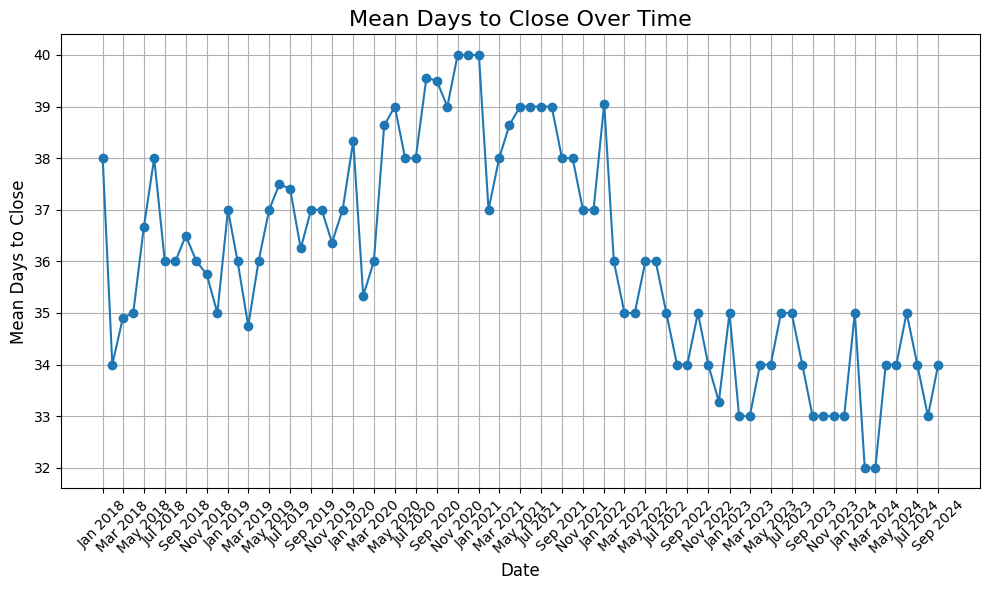

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'Date' column is in datetime format
reduced_mean_df['Date'] = pd.to_datetime(reduced_mean_df['Date'], errors='coerce')

# Sort by date (if necessary)
reduced_mean_df = reduced_mean_df.sort_values('Date')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(reduced_mean_df['Date'], reduced_mean_df['Mean_Days_To_Close'], marker='o', linestyle='-')

# Add titles and labels
plt.title("Mean Days to Close Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean Days to Close", fontsize=12)

# Format the X-axis to show every other date
ax = plt.gca()

# Select every other date for tick positions
tick_positions = reduced_mean_df['Date'][::2]  # Every second date
tick_labels = tick_positions.dt.strftime('%b %Y')  # Convert to formatted strings

# Apply the custom ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

# Rotate X-axis labels for readability
plt.xticks(rotation=45)

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


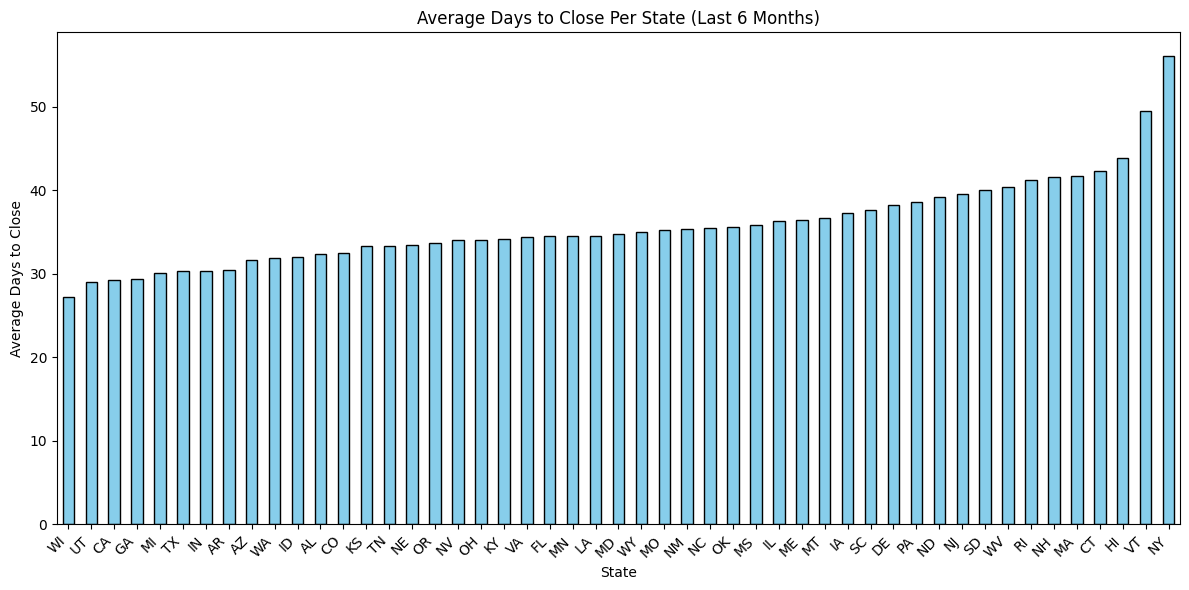

In [81]:
# Plot average days to close within the last 6 months per each state
# This will give us a better understanding which states have a lower days to close
# Which will be critical for us to sell a house as quickly as possible, if needed

# Get the last 6 months of data columns
# 6 months was chosen since based on the scatter plot above
# The slope of the data for the last few years is flat
# 6 months is enough time to get a sense of direction, without going back too long
last_6_months_columns = df_mean.columns[-6:]

# Calculate the average days to close per state for the last 6 months
state_avg_days_to_close = df_mean.groupby('StateName')[last_6_months_columns].mean().mean(axis=1)

# Bar Chart: Average Days to Close per State
plt.figure(figsize=(12, 6))
state_avg_days_to_close.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Days to Close Per State (Last 6 Months)')
plt.ylabel('Average Days to Close')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

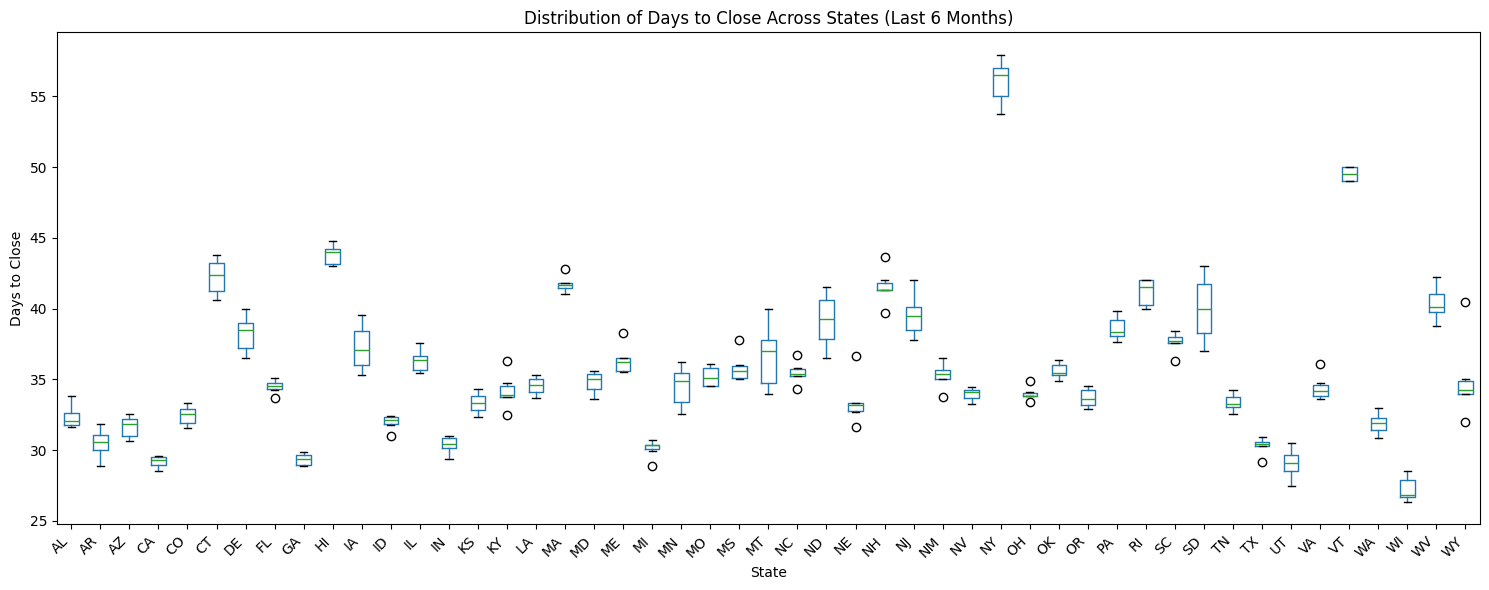

In [82]:
# Box Plot to show more information about days to close per state
boxplot_data = df_mean.groupby('StateName')[last_6_months_columns].mean()

plt.figure(figsize=(15, 6))
boxplot_data.T.boxplot(grid=False)
plt.title('Distribution of Days to Close Across States (Last 6 Months)')
plt.ylabel('Days to Close')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

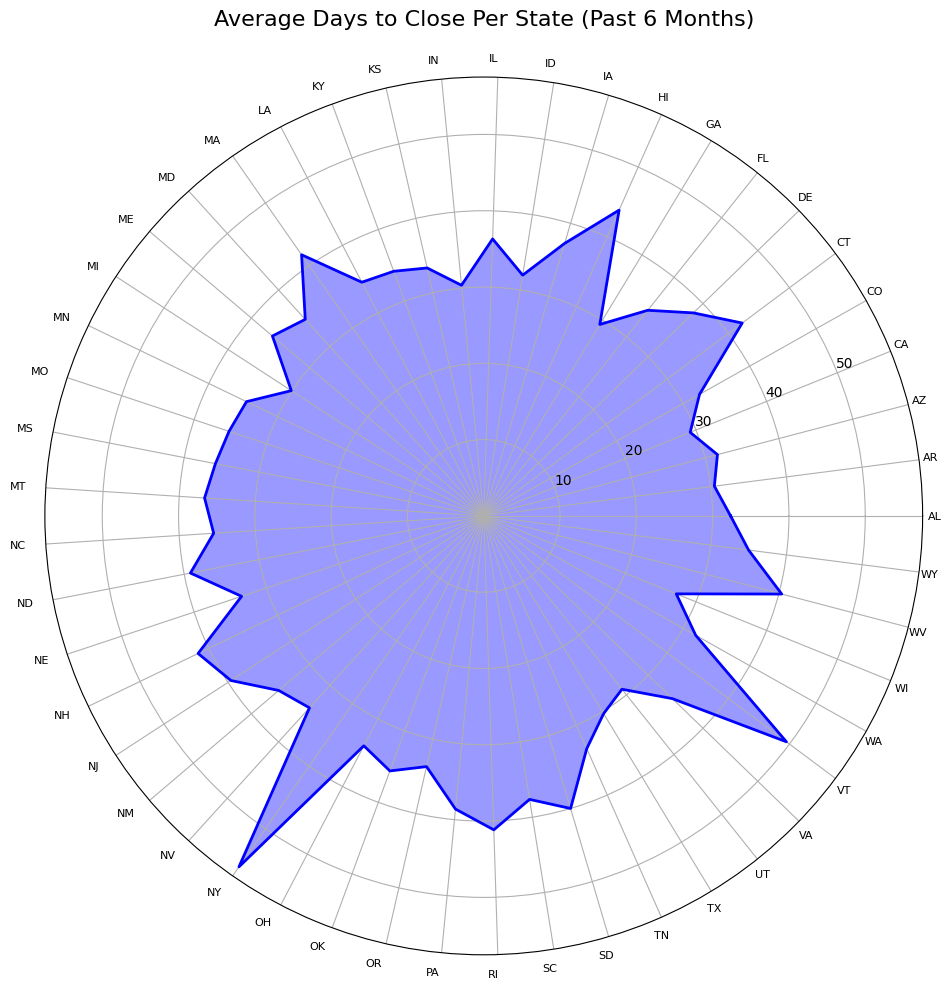

In [83]:
# There are too many states for a boxplot and bar chart, let's try a Radar plot

states = state_avg_days_to_close.index
values = state_avg_days_to_close.values
num_states = len(states)

# Calculate angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_states, endpoint=False).tolist()
values = np.append(values, values[0])
angles += angles[:1]

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='b', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='blue', alpha=0.4)

# Add labels
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_yticklabels(["10", "20", "30", "40", "50"], color="black", size=10)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(states, size=8, ha='right')

# Title and layout adjustments
plt.title('Average Days to Close Per State (Past 6 Months)', size=16, pad=20)
plt.tight_layout()
plt.show()

In [84]:
# Group data by StateName, calculate the mean
state_avg_days_to_close = df_mean.groupby('StateName')[date_columns].mean().mean(axis=1)

# Sort states by the means days to close and select the top 5
top_5_least_days_to_close = state_avg_days_to_close.sort_values().head(5)

# Convert to DataFrame and reset index for presentation
least_5_table = top_5_least_days_to_close.reset_index()

# Rename columns
least_5_table.columns = ['State', 'Average Days to Close']

# Round the values to integers
least_5_table['Average Days to Close'] = least_5_table['Average Days to Close'].round().astype(int)

# Print the table
display(least_5_table)


State  Average Days to Close
0    WI                     26
1    UT                     29
2    TX                     31
3    GA                     32
4    ID                     33

In [85]:
# Plot least 5 states to close seperatly to show the trend as well

In [86]:
# Function to print top states by period
def print_lowest_close_states_by_period(df, start_date, end_date, number_of_states=5):
    # Identify date columns by "20" pattern indicating a date column
    date_columns = [col for col in df.columns if col.startswith('20')]
    
    # Sort date columns
    date_columns_sorted = sorted(date_columns, key=lambda x: pd.to_datetime(x, errors='coerce'))

    # Select date range
    date_range = [col for col in date_columns_sorted if start_date <= col <= end_date]
    
    # Ensure there are columns in the range
    if not date_range:
        print(f"No data available for the range {start_date} to {end_date}")
        return
    
    # Calculate the average for the period
    state_avg = df.groupby('StateName')[date_range].mean().mean(axis=1)
    
    # Get the top N states
    top_states = state_avg.sort_values().head(number_of_states)
    
    # Format the result
    result_table = top_states.reset_index()
    result_table.columns = ['State', f'Average Days to Close ({start_date} to {end_date})']
    result_table[f'Average Days to Close ({start_date} to {end_date})'] = result_table[
        f'Average Days to Close ({start_date} to {end_date})'
    ].round().astype(int)
    
    return result_table

# Example usage for the last 6 months and prior periods
# Define ranges (you can adjust these as needed)
last_6_months = ("2024-03", "2024-09")
prev_6_months = ("2023-08", "2024-02")
prev_6_months_2 = ("2023-01", "2024-07")

# Display results for last 6 months, previous 6 months, and the 6 months prior to that
display("Last 6 months:")
display(print_lowest_close_states_by_period(df_mean, *last_6_months))

display("Previous 6 months:")
display(print_lowest_close_states_by_period(df_mean, *prev_6_months))

display("6 months before that:")
display(print_lowest_close_states_by_period(df_mean, *prev_6_months_2))


'Last 6 months:'

State  Average Days to Close (2024-03 to 2024-09)
0    WI                                          27
1    CA                                          29
2    UT                                          29
3    GA                                          29
4    TX                                          30

'Previous 6 months:'

State  Average Days to Close (2023-08 to 2024-02)
0    WI                                          27
1    UT                                          28
2    GA                                          29
3    IN                                          30
4    TX                                          30

'6 months before that:'

State  Average Days to Close (2023-01 to 2024-07)
0    WI                                          27
1    UT                                          29
2    GA                                          29
3    CA                                          30
4    TX                                          30

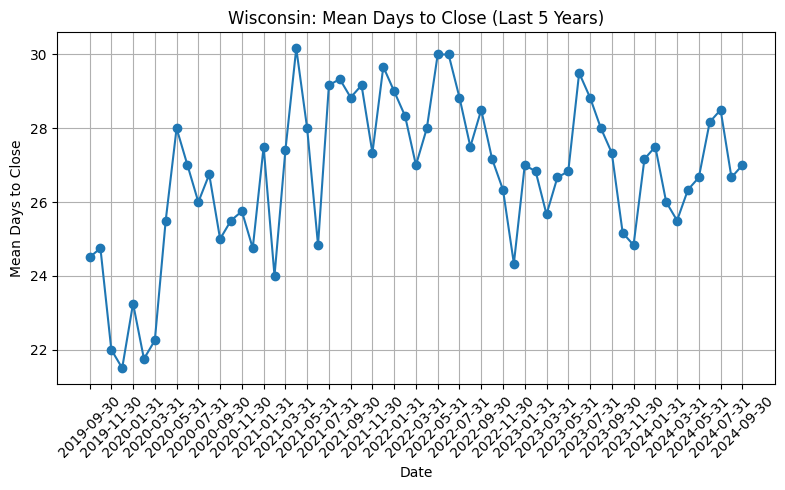

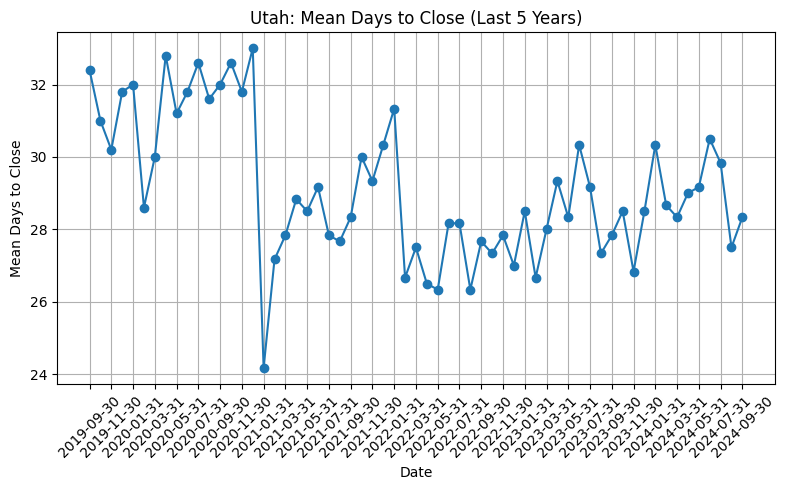

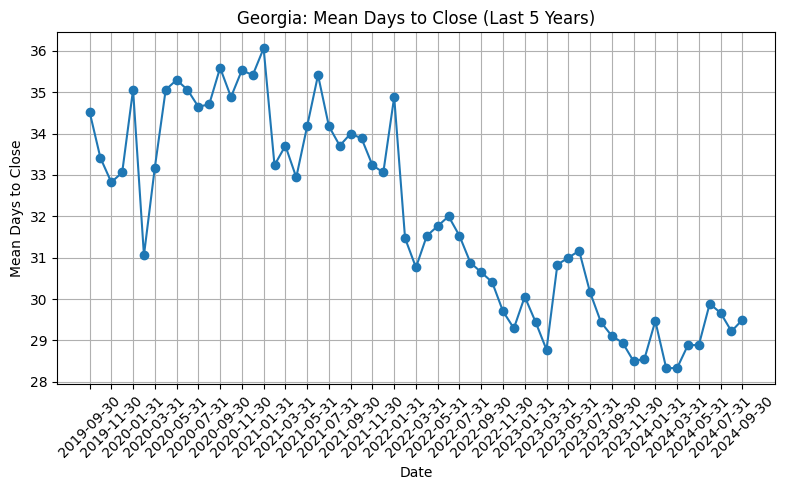

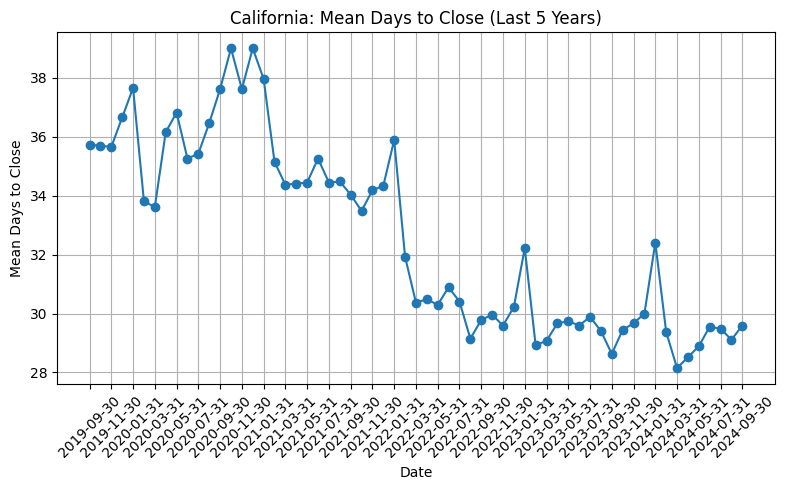

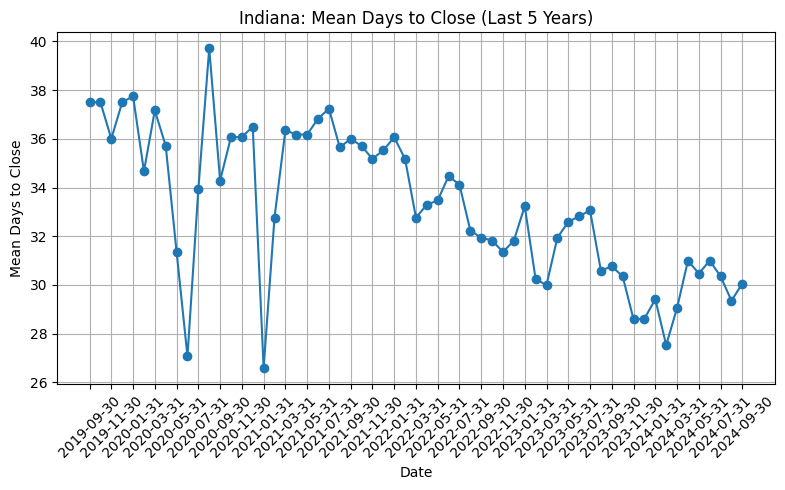

In [94]:
# For the top 5 states with the least days to close for the current month
# Is there an upward trend or downward trend? 
# This will give us more information about the trend over the years

# us library used to convert state abbreviations to state names
import us

# Filter out all columns that are not numeric columns (i.e. with string type data)
numeric_columns = df_mean.columns[~df_mean.columns.isin(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])]

# Group by StateName and calculate the mean
df_grouped = df_mean.groupby('StateName')[numeric_columns].mean()

# Get the top 5 states with the least mean days to close for the most recent month
recent_column = '2024-09-30'
top_states = df_grouped.nsmallest(5, recent_column).index

# Get data for the last 5 years
date_columns = [col for col in df_grouped.columns if '20' in col and '2019-09-30' <= col <= '2024-09-30']
df_filtered = df_grouped.loc[top_states, date_columns]

# Step 5: Plot each state separately
for state in df_filtered.index:
    data = df_filtered.loc[state]
    plt.figure(figsize=(8, 5))
    plt.plot(data.index, data.values, marker='o')
    plt.title(f"{us.states.lookup(state)}: Mean Days to Close (Last 5 Years)")
    plt.xlabel("Date")
    plt.ylabel("Mean Days to Close")
    
    # Show every other label
    xticks_positions = range(0, len(data.index), 2) # X-axis is too cluttered, only show every other month
    xticks_labels = [data.index[i] for i in xticks_positions]
    plt.xticks(xticks_positions, xticks_labels, rotation=45)
    
    plt.grid(True)
    plt.tight_layout()